<h3>
Universidade Federal da Paraíba<br>
Centro de Informática<br>
Bacharelado em Ciência de Dados e Inteligência Artificial<br>
Disciplina: Séries Temporais<br>
Discentes: Guilheme Iram, Maxwel Barbosa<br>
<h3>

## Análise Exploratória dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
from IPython.display import display, HTML

In [2]:
styles = """
<style>
.output {
    display: flex;
    justify-content: center;
}
</style>
"""

display(HTML(styles))

In [3]:
dataset = pd.read_csv("../data/gold_price_data.csv")

In [4]:
dataset.Value.describe()

count    10787.000000
mean       653.596634
std        434.030848
min         35.100000
25%        349.200000
50%        409.350000
75%       1061.625000
max       1895.000000
Name: Value, dtype: float64

In [5]:
dataset[dataset.Value == dataset.Value.max()]

,Date,Value
8562,2011-09-05,1895.0
8563,2011-09-06,1895.0


In [6]:
fig = px.box(data_frame=dataset, y= dataset.Value, title='Boxplot do preço do ouro')
fig.update_layout(yaxis_title='Valor em U$')
#fig.update_layout(width=700)

fig.show()

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [8]:
# Converting date to datetime and setting it as index
dataset['Date'] = pd.to_datetime(dataset['Date'])
serie_temporal = pd.Series(dataset['Value'])
serie_temporal.index = dataset['Date']

In [9]:
serie_temporal

Date
1970-01-01      35.20
1970-04-01      35.10
1970-07-01      35.40
1970-10-01      36.20
1971-01-01      37.40
               ...   
2020-03-09    1672.50
2020-03-10    1655.70
2020-03-11    1653.75
2020-03-12    1570.70
2020-03-13    1562.80
Name: Value, Length: 10787, dtype: float64

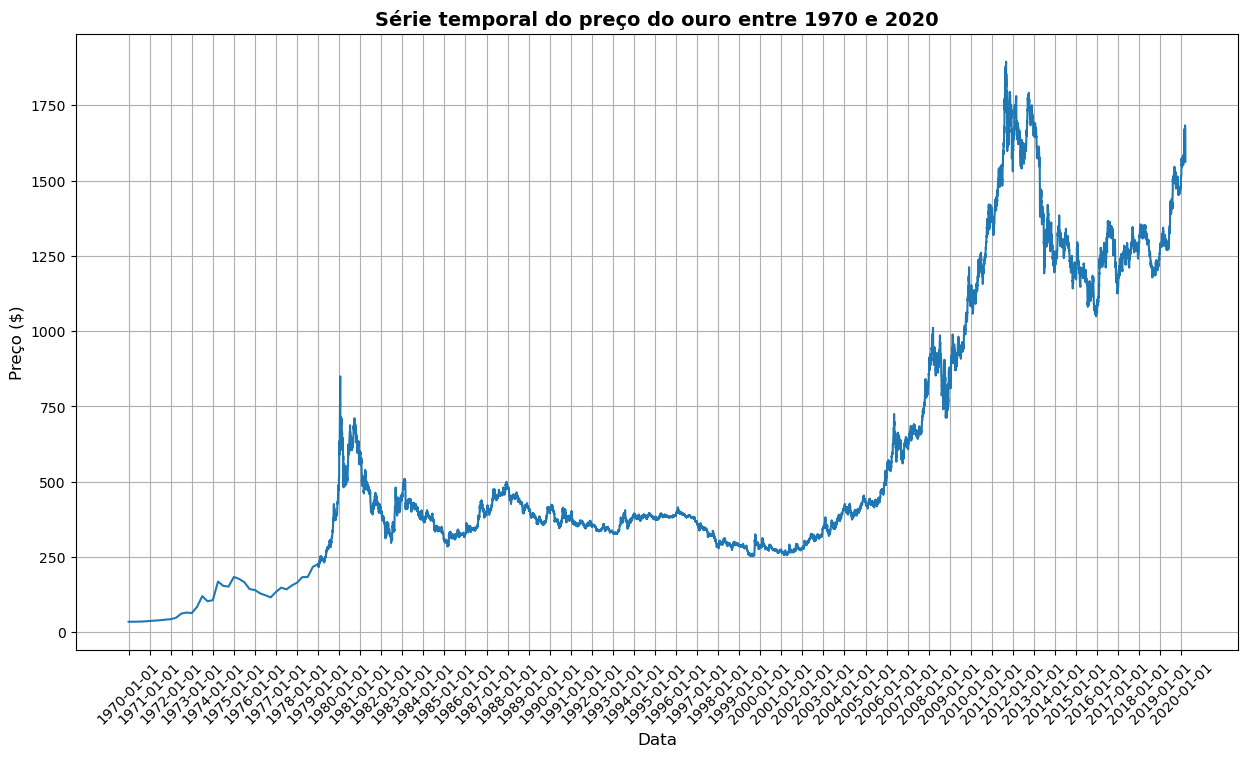

In [10]:
plt.figure(figsize=(15, 8))
plt.plot(serie_temporal)

plt.title('Série temporal do preço do ouro entre 1970 e 2020', fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço ($)', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)
plt.savefig('../img/gold_price_time_series.png')
#plt.show()


In [11]:

fig = px.line(dataset, x='Date', y='Value', title='Série temporal do preço do ouro entre 1970 e 2020', width=1200, height=500)

fig.update_layout(xaxis_title='Data', yaxis_title='Valor em U$')
fig.show()

In [12]:
# Decomposição da série temporal em tendência, sazonalidade e resíduos
decomposition = sm.tsa.seasonal_decompose(serie_temporal, model='additive', period=365)

# Obtendo as partes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

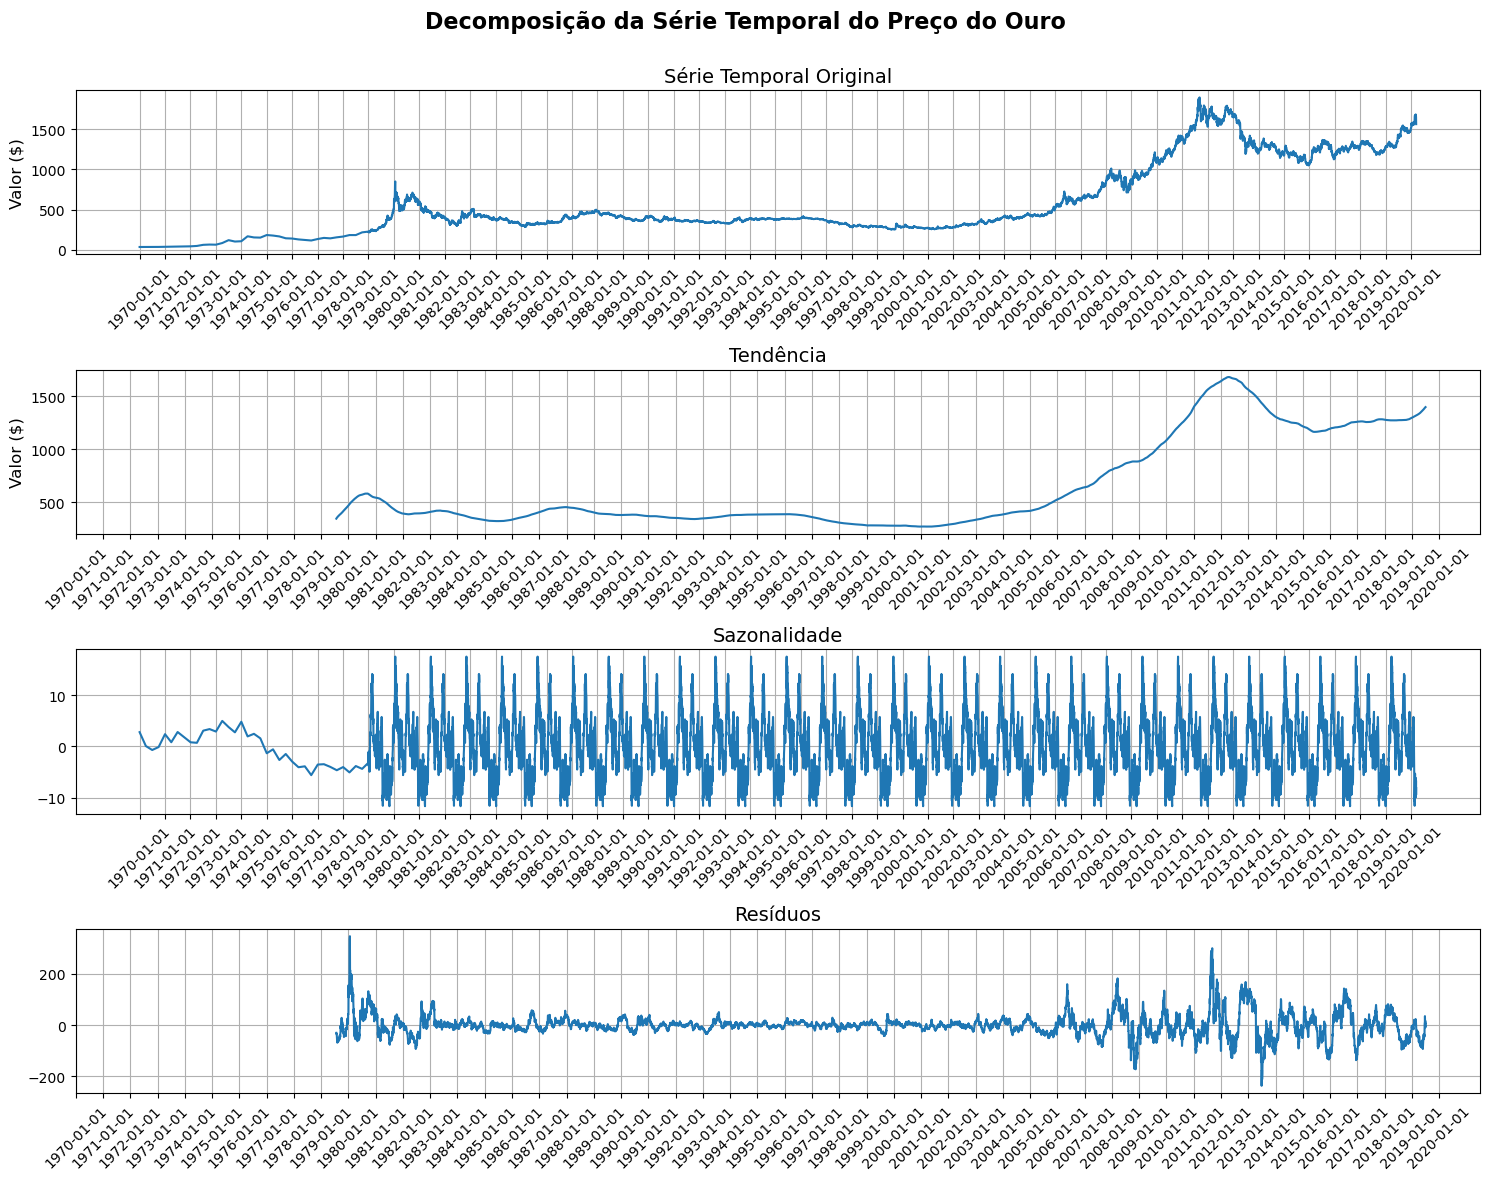

In [13]:
plt.figure(figsize=(15, 12))

# Série Temporal Original
plt.subplot(4, 1, 1)
plt.plot(serie_temporal)
plt.title('Série Temporal Original', fontsize=14)
plt.ylabel('Valor ($)', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Tendência
plt.subplot(4, 1, 2)
plt.plot(trend)
plt.title('Tendência', fontsize=14)
plt.ylabel('Valor ($)', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Sazonalidade
plt.subplot(4, 1, 3)
plt.plot(seasonal)
plt.title('Sazonalidade', fontsize=14)
# plt.ylabel('Valor', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Resíduos
plt.subplot(4, 1, 4)
plt.plot(residual)
plt.title('Resíduos', fontsize=14)
# plt.ylabel('Valor', fontsize=12)
plt.xticks(pd.date_range(start=serie_temporal.index.min(), end=serie_temporal.index.max(), freq='YS'), rotation=45)
plt.grid(True)

# Ajustar o intervalo do eixo x para mostrar todos os anos


# Título maior para a figura
plt.suptitle('Decomposição da Série Temporal do Preço do Ouro\n', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('../img/gold_price_time_series_decomposition.png')
plt.show()